## Setup Target Board

In [1]:
PLATFORM = 'CWLITEARM'
CRYPTO_TARGET = 'NONE'
SS_VER = 'SS_VER_1_1'

## Detect Chipwhisperer Board

In [2]:
import time
import chipwhisperer as cw

scope = cw.scope()

target_type = cw.targets.SimpleSerial
try:
    target = cw.target(scope, target_type)
except:
    print("INFO: Caught exception on reconnecting to target - attempting to reconnect to scope first.")
    print("INFO: This is a work-around when USB has died without Python knowing. Ignore errors above this line.")
    scope = cw.scope()
    target = cw.target(scope, target_type)

print("INFO: Found ChipWhisperer😍")

prog = cw.programmers.STM32FProgrammer

time.sleep(0.05)
scope.default_setup()
def reset_target(scope):
    scope.io.nrst = 'low'
    time.sleep(0.05)
    scope.io.nrst = 'high_z'
    time.sleep(0.05)


INFO: Found ChipWhisperer😍


## Compile

There are some warnings (for now). 

In [3]:
%%bash -s "$SS_VER" "$PLATFORM" "$CRYPTO_TARGET"
rm -rf objdir-$2 objdir .dep
make SS_VER=$1 PLATFORM=$2 CRYPTO_TARGET=$3

Building for platform CWLITEARM with CRYPTO_TARGET=NONE
SS_VER set to SS_VER_1_1
rm -f -- simpleserial_sca25519-CWLITEARM.hex
rm -f -- simpleserial_sca25519-CWLITEARM.eep
rm -f -- simpleserial_sca25519-CWLITEARM.cof
rm -f -- simpleserial_sca25519-CWLITEARM.elf
rm -f -- simpleserial_sca25519-CWLITEARM.map
rm -f -- simpleserial_sca25519-CWLITEARM.sym
rm -f -- simpleserial_sca25519-CWLITEARM.lss
rm -f -- objdir/*.o
rm -f -- objdir/*.lst
rm -f -- main.s test.s crypto/numerics/fe25519.s crypto/numerics/fe25519_invert.s crypto/numerics/sc25519.s crypto/numerics/bigint.s crypto/scalarmult/scalarmult_25519.s crypto/support/randombytes.s simpleserial.s stm32f3_hal.s stm32f3_hal_lowlevel.s stm32f3_sysmem.s
rm -f -- main.d test.d crypto/numerics/fe25519.d crypto/numerics/fe25519_invert.d crypto/numerics/sc25519.d crypto/numerics/bigint.d crypto/scalarmult/scalarmult_25519.d crypto/support/randombytes.d simpleserial.d stm32f3_hal.d stm32f3_hal_lowlevel.d stm32f3_sysmem.d
rm -f -- main.i test.i cry

main.c: In function 'sca25519_test':
main.c:40:3: warning: implicit declaration of function 'sprintf' [-Wimplicit-function-declaration]
   40 |   sprintf(str, "Tests output : %lu", res);
      |   ^~~~~~~
main.c:40:3: warning: incompatible implicit declaration of built-in function 'sprintf'
main.c:13:1: note: include '<stdio.h>' or provide a declaration of 'sprintf'
   12 | #include "simpleserial.h"
  +++ |+#include <stdio.h>
   13 | 
main.c:32:7: warning: unused variable 'i' [-Wunused-variable]
   32 |   int i;
      |       ^
main.c:31:11: warning: unused variable 'result' [-Wunused-variable]
   31 |   uint8_t result[32];
      |           ^~~~~~
main.c: In function 'sca25519_one':
main.c:58:9: warning: implicit declaration of function 'test_curve25519_DH_TV_once'; did you mean 'test_curve25519_DH_TV'? [-Wimplicit-function-declaration]
   58 |   res = test_curve25519_DH_TV_once();
      |         ^~~~~~~~~~~~~~~~~~~~~~~~~~
      |         test_curve25519_DH_TV
main.c:61:3: warning: i

.
Compiling C: test.c
arm-none-eabi-gcc -c -mcpu=cortex-m4 -I.  -mthumb -mfloat-abi=soft -fmessage-length=0 -ffunction-sections -gdwarf-2 -DSTM32F4 -DCORTEX_M4 -mthumb -mcpu=cortex-m4 -mfpu=fpv4-sp-d16 -DSS_VER=SS_VER_1_1 -DSTM32F303xC -DSTM32F3 -DSTM32 -DDEBUG -DHAL_TYPE=HAL_stm32f3 -DPLATFORM=CWLITEARM -DF_CPU=7372800UL -DSS_VER_2_0=2 -DSS_VER_2_1=3 -DSS_VER_1_1=1 -DSS_VER_1_0=0 -O2 -funsigned-char -funsigned-bitfields -fshort-enums -Wall -Wstrict-prototypes -Wa,-adhlns=objdir/test.lst -I.././simpleserial/ -I.././hal -I.././hal/stm32f3 -I.././hal/stm32f3/CMSIS -I.././hal/stm32f3/CMSIS/core -I.././hal/stm32f3/CMSIS/device -I.././hal/stm32f4/Legacy -I.././crypto/ -std=gnu99  -MMD -MP -MF .dep/test.o.d test.c -o objdir/test.o


test.c:112:5: warning: function declaration isn't a prototype [-Wstrict-prototypes]
  112 | int test_curve25519_DH_TV_once() {
      |     ^~~~~~~~~~~~~~~~~~~~~~~~~~
test.c: In function 'test_curve25519_DH_TV_once':
test.c:141:11: warning: unused variable 'correct_ss' [-Wunused-variable]
  141 |   uint8_t correct_ss[] = {0x4A, 0x5D, 0x9D, 0x5B, 0xA4, 0xCE, 0x2D, 0xE1,
      |           ^~~~~~~~~~
test.c:137:11: warning: unused variable 'correct_pk_B' [-Wunused-variable]
  137 |   uint8_t correct_pk_B[] = {0xDE, 0x9E, 0xDB, 0x7D, 0x7B, 0x7D, 0xC1, 0xB4,
      |           ^~~~~~~~~~~~
test.c:131:11: warning: unused variable 'ss_B' [-Wunused-variable]
  131 |   uint8_t ss_B[32];
      |           ^~~~
test.c:130:11: warning: unused variable 'ss_A' [-Wunused-variable]
  130 |   uint8_t ss_A[32];
      |           ^~~~
test.c:129:11: warning: unused variable 'pk_B' [-Wunused-variable]
  129 |   uint8_t pk_B[32];
      |           ^~~~


.
Compiling C: crypto/numerics/fe25519.c
arm-none-eabi-gcc -c -mcpu=cortex-m4 -I.  -mthumb -mfloat-abi=soft -fmessage-length=0 -ffunction-sections -gdwarf-2 -DSTM32F4 -DCORTEX_M4 -mthumb -mcpu=cortex-m4 -mfpu=fpv4-sp-d16 -DSS_VER=SS_VER_1_1 -DSTM32F303xC -DSTM32F3 -DSTM32 -DDEBUG -DHAL_TYPE=HAL_stm32f3 -DPLATFORM=CWLITEARM -DF_CPU=7372800UL -DSS_VER_2_0=2 -DSS_VER_2_1=3 -DSS_VER_1_1=1 -DSS_VER_1_0=0 -O2 -funsigned-char -funsigned-bitfields -fshort-enums -Wall -Wstrict-prototypes -Wa,-adhlns=objdir/fe25519.lst -I.././simpleserial/ -I.././hal -I.././hal/stm32f3 -I.././hal/stm32f3/CMSIS -I.././hal/stm32f3/CMSIS/core -I.././hal/stm32f3/CMSIS/device -I.././hal/stm32f4/Legacy -I.././crypto/ -std=gnu99  -MMD -MP -MF .dep/fe25519.o.d crypto/numerics/fe25519.c -o objdir/crypto/numerics/fe25519.o
.
Compiling C: crypto/numerics/fe25519_invert.c
arm-none-eabi-gcc -c -mcpu=cortex-m4 -I.  -mthumb -mfloat-abi=soft -fmessage-length=0 -ffunction-sections -gdwarf-2 -DSTM32F4 -DCORTEX_M4 -mthumb -mcpu=co

In file included from .././hal/stm32f3/stm32f3xx_hal_def.h:49,
                 from .././hal/stm32f3/stm32f3xx_hal_rcc.h:47,
                 from .././hal/stm32f3/stm32f3_hal.c:4:
.././hal/stm32f3/Legacy/stm32_hal_legacy.h:452: warning: "GPIO_SPEED_HIGH" redefined
  452 |  #define  GPIO_SPEED_HIGH   GPIO_SPEED_FREQ_HIGH
      | 
.././hal/stm32f3/Legacy/stm32_hal_legacy.h:439: note: this is the location of the previous definition
  439 | #define  GPIO_SPEED_HIGH                          GPIO_SPEED_FREQ_VERY_HIGH
      | 


.
Compiling C: .././hal/stm32f3/stm32f3_hal_lowlevel.c
arm-none-eabi-gcc -c -mcpu=cortex-m4 -I.  -mthumb -mfloat-abi=soft -fmessage-length=0 -ffunction-sections -gdwarf-2 -DSTM32F4 -DCORTEX_M4 -mthumb -mcpu=cortex-m4 -mfpu=fpv4-sp-d16 -DSS_VER=SS_VER_1_1 -DSTM32F303xC -DSTM32F3 -DSTM32 -DDEBUG -DHAL_TYPE=HAL_stm32f3 -DPLATFORM=CWLITEARM -DF_CPU=7372800UL -DSS_VER_2_0=2 -DSS_VER_2_1=3 -DSS_VER_1_1=1 -DSS_VER_1_0=0 -O2 -funsigned-char -funsigned-bitfields -fshort-enums -Wall -Wstrict-prototypes -Wa,-adhlns=objdir/stm32f3_hal_lowlevel.lst -I.././simpleserial/ -I.././hal -I.././hal/stm32f3 -I.././hal/stm32f3/CMSIS -I.././hal/stm32f3/CMSIS/core -I.././hal/stm32f3/CMSIS/device -I.././hal/stm32f4/Legacy -I.././crypto/ -std=gnu99  -MMD -MP -MF .dep/stm32f3_hal_lowlevel.o.d .././hal/stm32f3/stm32f3_hal_lowlevel.c -o objdir/stm32f3_hal_lowlevel.o


In file included from .././hal/stm32f3/stm32f3xx_hal_def.h:49,
                 from .././hal/stm32f3/stm32f3xx_hal_rcc.h:47,
                 from .././hal/stm32f3/stm32f3_hal_lowlevel.c:40:
.././hal/stm32f3/Legacy/stm32_hal_legacy.h:452: warning: "GPIO_SPEED_HIGH" redefined
  452 |  #define  GPIO_SPEED_HIGH   GPIO_SPEED_FREQ_HIGH
      | 
.././hal/stm32f3/Legacy/stm32_hal_legacy.h:439: note: this is the location of the previous definition
  439 | #define  GPIO_SPEED_HIGH                          GPIO_SPEED_FREQ_VERY_HIGH
      | 


.
Compiling C: .././hal/stm32f3/stm32f3_sysmem.c
arm-none-eabi-gcc -c -mcpu=cortex-m4 -I.  -mthumb -mfloat-abi=soft -fmessage-length=0 -ffunction-sections -gdwarf-2 -DSTM32F4 -DCORTEX_M4 -mthumb -mcpu=cortex-m4 -mfpu=fpv4-sp-d16 -DSS_VER=SS_VER_1_1 -DSTM32F303xC -DSTM32F3 -DSTM32 -DDEBUG -DHAL_TYPE=HAL_stm32f3 -DPLATFORM=CWLITEARM -DF_CPU=7372800UL -DSS_VER_2_0=2 -DSS_VER_2_1=3 -DSS_VER_1_1=1 -DSS_VER_1_0=0 -O2 -funsigned-char -funsigned-bitfields -fshort-enums -Wall -Wstrict-prototypes -Wa,-adhlns=objdir/stm32f3_sysmem.lst -I.././simpleserial/ -I.././hal -I.././hal/stm32f3 -I.././hal/stm32f3/CMSIS -I.././hal/stm32f3/CMSIS/core -I.././hal/stm32f3/CMSIS/device -I.././hal/stm32f4/Legacy -I.././crypto/ -std=gnu99  -MMD -MP -MF .dep/stm32f3_sysmem.o.d .././hal/stm32f3/stm32f3_sysmem.c -o objdir/stm32f3_sysmem.o
.
Assembling: crypto/asm/cortex_m4_sqr_fe25519.S
arm-none-eabi-gcc -c -mcpu=cortex-m4 -I. -x assembler-with-cpp -mthumb -mfloat-abi=soft -fmessage-length=0 -ffunction-sections -DF_C

.
Creating load file for EEPROM: simpleserial_sca25519-CWLITEARM.eep
arm-none-eabi-objcopy -j .eeprom --set-section-flags=.eeprom="alloc,load" \
--change-section-lma .eeprom=0 --no-change-warnings -O ihex simpleserial_sca25519-CWLITEARM.elf simpleserial_sca25519-CWLITEARM.eep || exit 0
.
Creating Extended Listing: simpleserial_sca25519-CWLITEARM.lss
arm-none-eabi-objdump -h -S -z simpleserial_sca25519-CWLITEARM.elf > simpleserial_sca25519-CWLITEARM.lss
.
Creating Symbol Table: simpleserial_sca25519-CWLITEARM.sym
arm-none-eabi-nm -n simpleserial_sca25519-CWLITEARM.elf > simpleserial_sca25519-CWLITEARM.sym
Size after:
   text	   data	    bss	    dec	    hex	filename
  19292	    108	   1452	  20852	   5174	simpleserial_sca25519-CWLITEARM.elf
+--------------------------------------------------------
+ Default target does full rebuild each time.
+ Specify buildtarget == allquick == to avoid full rebuild
+--------------------------------------------------------
+-----------------------------

## Flash Binary on the Victim Board

**Note:** If you use a STM32F target board of Revision-02 then you first need to set a specific jumper cable on the UFO board for the following code to work.

For more information have a look here: https://rtfm.newae.com/Targets/UFO%20Targets/CW308T-STM32F/

In [4]:
HEXFILE = "./simpleserial_sca25519-" + PLATFORM + ".hex"
cw.program_target(scope, prog, HEXFILE)

Detected known STMF32: STM32F302xB(C)/303xB(C)
Extended erase (0x44), this can take ten seconds or more
Attempting to program 19407 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 19407 bytes


## Test software

Just a test echo command.

In [5]:
# Send test signal
CMD_TEST = 'e'

DATA_LEN=16
RESP_LEN=16

target.flush()
msg = bytearray([x for x in range(DATA_LEN)])
scope.arm()
target.simpleserial_write(CMD_TEST,msg)
scope.capture()
response = target.simpleserial_read('r', RESP_LEN)
print("res: {}".format(response))

res: CWbytearray(b'00 01 02 03 04 05 06 07 08 09 0a 0b 0c 0d 0e 0f')


## Capute a trace

Now we capture a single trace. Be aware that for your target you will need to adjust 
```python
scope.adc.samples = ...
scope.adc.decimate = ...
```

#### Capturing traces for analysis

Note that to capture traces for analysis you need save not only the traces but also the code would need to be modified to save the input and output data. 

res: CWbytearray(b'53 61 6e 69 74 79 20 63 68 65 63 6b 20 3a 20 30')
666769


<IPython.core.display.Javascript object>


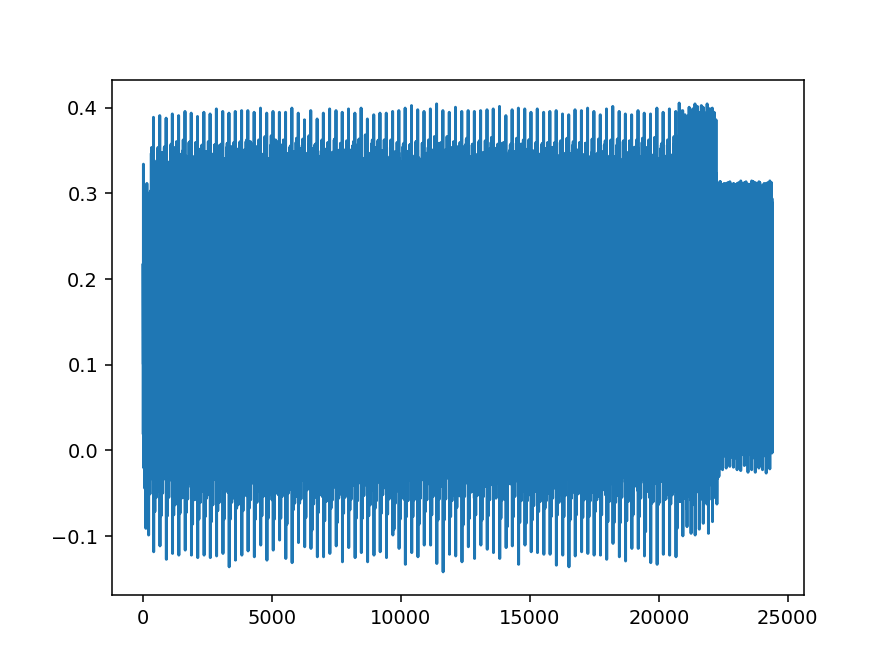

In [6]:
%matplotlib notebook
#%matplotlib notebook
import matplotlib.pyplot as plt
CMD_TEST = 'b'

scope.adc.samples = 24400
scope.adc.decimate = 30
scope.clock.adc_src = 'clkgen_x1'
scope.gain.db = 30

target.flush()
msg = bytearray([x for x in range(DATA_LEN)])
scope.arm()
target.simpleserial_write(CMD_TEST,msg)
scope.capture()
response = target.simpleserial_read('r', RESP_LEN)
print("res: {}".format(response))

last_trace = scope.get_last_trace()
print(scope.adc.trig_count)
plt.plot(last_trace)
plt.show()

## Disconnect from Board

In [7]:
scope.dis()
target.dis()